In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

Matplotlib is building the font cache; this may take a moment.


In [2]:
agent_log_env = pd.read_csv("/Users/ryaneng/Desktop/browncs/sph_lab/cadre/python/output_20240702_204607/agent_log.csv")

# Assuming input_params is stored in a YAML file
with open("/Users/ryaneng/Desktop/browncs/sph_lab/cadre/python/myparams/model_params.yaml", 'r') as stream:
    input_params = yaml.safe_load(stream)

# Extract dataframes from the environment
agent_dt = agent_log_env

In [3]:
#Taking last ticks of data for later graph use
last_tick = agent_dt['tick'].max()
selected_ticks = list(range(1, last_tick, 10)) + [last_tick]

#Head count of agents and ids
unique_agents = len(agent_dt['id'].unique())
id_range = (agent_dt['id'].min(), agent_dt['id'].max())

print(f"Number of unique agents: {unique_agents}")
print(f"ID range: {id_range}")

Number of unique agents: 15713
ID range: (np.int64(0), np.int64(15712))


In [4]:
# Race distribution
agent_dt_by_race = agent_dt[agent_dt['tick'] == last_tick].groupby('race').size().reset_index(name='N')
agent_dt_by_race['per_cent'] = round(agent_dt_by_race['N'] / agent_dt_by_race['N'].sum() * 100)
agent_dt_by_race = agent_dt_by_race.sort_values(by='race')

# Taking target values from yaml- these should be values that are simulation should match up with
target_values = pd.DataFrame({
    'race': list(input_params['RACE_DISTRIBUTION'].keys()),
    'target_pct': list(input_params['RACE_DISTRIBUTION'].values())
})

# Calculate race proportions by tick
time_ticks = list(range(1, last_tick, 10)) + [last_tick]
race_proportions_by_tick = agent_dt[agent_dt['tick'].isin(time_ticks)].pivot_table(
    index='tick',
    columns='race',
    aggfunc='size',
    fill_value=0
).apply(lambda x: x / x.sum(), axis=1).reset_index()

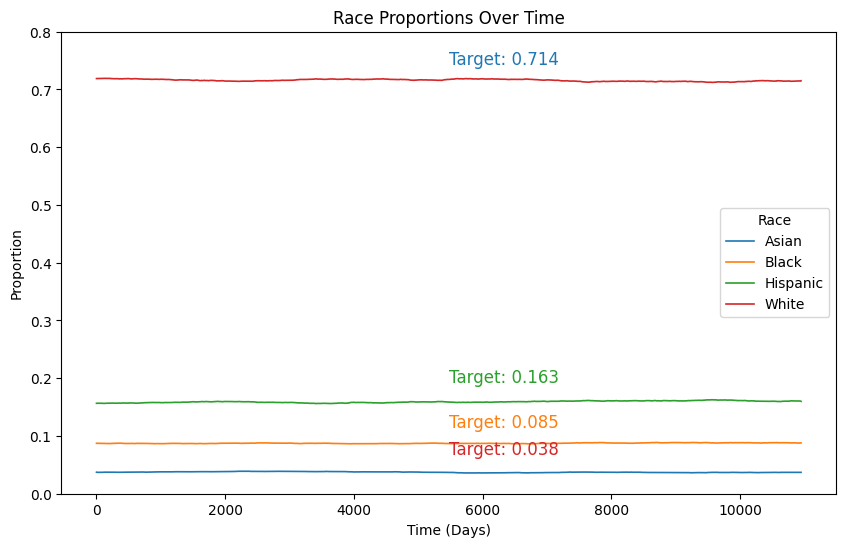

In [5]:
# Melt the data for plotting
race_proportions_long = race_proportions_by_tick.melt(id_vars='tick', var_name='race', value_name='proportion')

# Plot race proportions over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=race_proportions_long, x='tick', y='proportion', hue='race', linewidth=1.2)
plt.title('Race Proportions Over Time')
plt.xlabel('Time (Days)')
plt.ylabel('Proportion')
plt.ylim(0, 0.8)
plt.legend(title='Race')
for race in target_values['race']:
    target_pct = target_values[target_values['race'] == race]['target_pct'].values[0]
    plt.text(last_tick / 2, target_pct + 0.03, f'Target: {target_pct:.3f}', color=sns.color_palette()[list(target_values['race']).index(race)], fontsize=12)
plt.show()

/var/folders/5w/_sx0pyps50s6zzsjl55lmt340000gn/T/ipykernel_36882/2873870632.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Male', 'Female'], y=gender_pct['%'], palette=['#1b9e77', '#d95f02'])


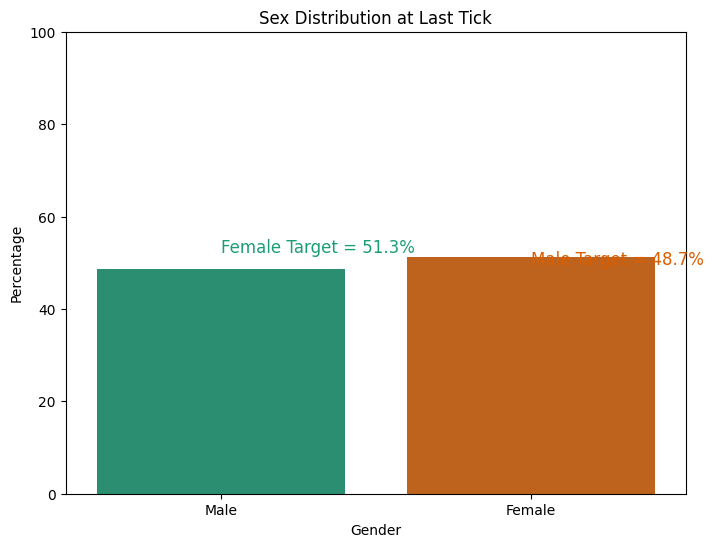

In [6]:
# Sex distribution
gender_pct = agent_dt[agent_dt['tick'] == last_tick].groupby('female').size().reset_index(name='N')
gender_pct['%'] = gender_pct['N'] / gender_pct['N'].sum() * 100
female_target = input_params['FEMALE_PROP']

female_actual_pct = gender_pct[gender_pct['female'] == 1]['%'].values[0]
male_actual_pct = gender_pct[gender_pct['female'] == 0]['%'].values[0]

# Plot sex distribution at last tick
plt.figure(figsize=(8, 6))
sns.barplot(x=['Male', 'Female'], y=gender_pct['%'], palette=['#1b9e77', '#d95f02'])
plt.text(0, female_actual_pct, f'Female Target = {female_actual_pct:.1f}%', color='#1b9e77', fontsize=12, va='bottom')
plt.text(1, male_actual_pct, f'Male Target = {male_actual_pct:.1f}%', color='#d95f02', fontsize=12, va='bottom')
plt.title('Sex Distribution at Last Tick')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()

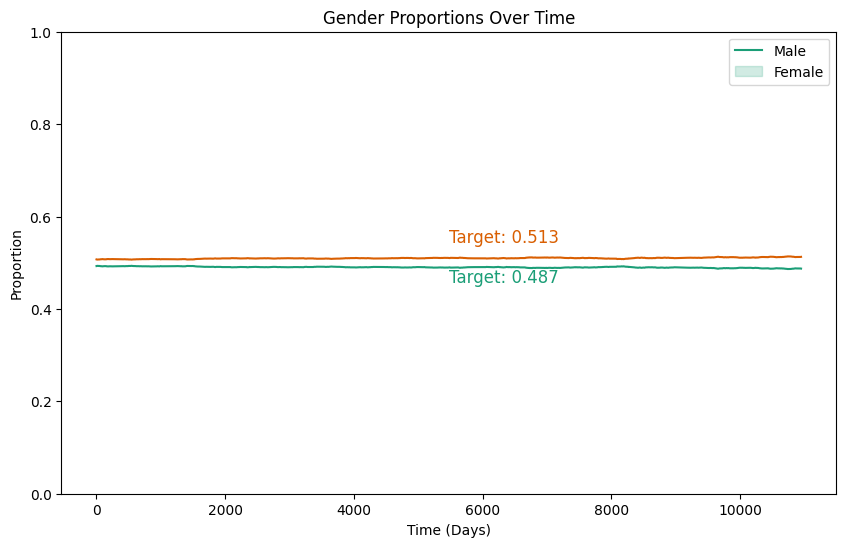

In [7]:
# Plot gender proportions over time
gender_proportions_by_tick = agent_dt[agent_dt['tick'].isin(time_ticks)].pivot_table(
    index='tick',
    columns='female',
    aggfunc='size',
    fill_value=0
).apply(lambda x: x / x.sum(), axis=1).reset_index()
gender_proportions_long = gender_proportions_by_tick.melt(id_vars='tick', var_name='gender', value_name='proportion')

plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_proportions_long, x='tick', y='proportion', hue='gender', palette=['#1b9e77', '#d95f02'], linewidth=1.5)
plt.title('Gender Proportions Over Time')
plt.xlabel('Time (Days)')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.legend(labels=['Male', 'Female'])
plt.text(last_tick / 2, female_target + 0.03, f'Target: {female_target:.3f}', color='#d95f02', fontsize=12)
plt.text(last_tick / 2, 1 - female_target - 0.03, f'Target: {1 - female_target:.3f}', color='#1b9e77', fontsize=12)
plt.show()

/var/folders/5w/_sx0pyps50s6zzsjl55lmt340000gn/T/ipykernel_36882/468590495.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agent_dt_by_age_group = agent_dt[agent_dt['tick'] == last_tick].groupby('age_groups').size().reset_index(name='N')
/var/folders/5w/_sx0pyps50s6zzsjl55lmt340000gn/T/ipykernel_36882/468590495.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_groups', y='N', data=agent_dt_by_age_group, palette='Set2')


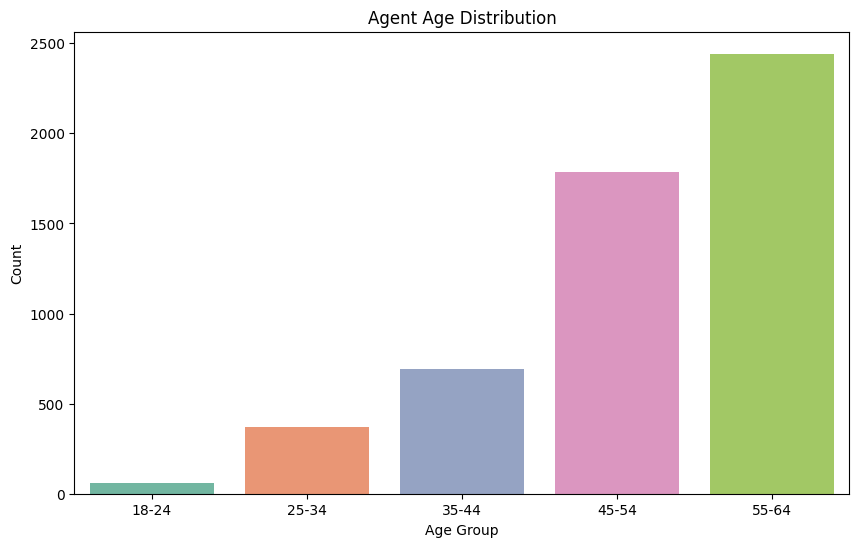

In [8]:
# Age distribution
agebreaks = [18, 25, 35, 45, 55, 65]
agelabels = ["18-24", "25-34", "35-44", "45-54", "55-64"]

agent_dt['age_groups'] = pd.cut(agent_dt['age'], bins=agebreaks, labels=agelabels, right=False)

agent_dt_by_age_group = agent_dt[agent_dt['tick'] == last_tick].groupby('age_groups').size().reset_index(name='N')

plt.figure(figsize=(10, 6))
sns.barplot(x='age_groups', y='N', data=agent_dt_by_age_group, palette='Set2')
plt.title('Agent Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()